# **Task 3 - Expolartory Data Analysis** 
# Retail Store
### Shashank Arun Sadafule
### Data Science and Business Analytics Intern at SPARKS Foundation, Feb 2022
<br>
As a Business Manager, I'll find what are the weak areas that could be improved upon to make good profit. <br><br>    
This is my first ever project in exploratory data analysis and following is the code that I've implemented.


### Importing required Libraries

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading the Data File

In [278]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Missing Values

In [279]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Remove Duplicate Data

In [280]:
print("Before removing duplicate data, shape: ", df.shape)

duplicate = df.duplicated()
df = df[~duplicate]

print("After removing duplicate data, shape: ", df.shape)

Before removing duplicate data, shape:  (9994, 13)
After removing duplicate data, shape:  (9977, 13)


##  Statistics of Categorical Features

In [281]:
df.describe(include=['O'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


### From the above table note following points:<br>
**1)** *'Standard Class*' is most frequently occuring Ship Mode. Almost 60% of the times.<br>
**2)** *'Consumer*' is the most frequently occuring Segment. Almost 50% of the times.<br>
**3)** There is only 1 unique country present, ie United States, hence we should *remove* that column entirely as it will not lead to any useful data analysis.<br>
**4)** There are 531 uniques cities and *'New York City'* occurs 915 / 9994 times, which is about 10%.  <br>
**5)** *California* occurs 2001 / 9994 times in States feature which accounts for almost 20% . We should try to find if there is any city in California that occurs frequently. Also New York City does not corresponds to California State!<br>
**6)** *'Office Supplies'* occurs 6026 / 9994 times, i.e almost 60% of the times. <br>
**7)** *'Binders'* is the frequently occuring Sub-Category. We must see what category it relates to.
<br>
<br>


In [282]:
#Drop the Country and Postal Code Column:-
df.drop('Country', axis ='columns', inplace = True) #inplace means we do the operation on itself, no assignment needed
df.drop('Postal Code', axis ='columns', inplace = True)

#Add Profit/Sales ratio as an extra column!
df['Profit/Sales'] = df['Profit']/df['Sales']
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit/Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


### Unique entires in some columns 

In [283]:
cat_col = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

print('Unique values for some categoies:-')

for i in cat_col:
    print(i)
    print(df[i].unique())

Unique values for some categoies:-
Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment
['Consumer' 'Corporate' 'Home Office']
Region
['South' 'West' 'Central' 'East']
Category
['Furniture' 'Office Supplies' 'Technology']
Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


## Statistics of Numerical Features

In [284]:
df.describe()

,Sales,Quantity,Discount,Profit,Profit/Sales
count,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
mean,230.148902,3.790719,0.156278,28.69013,0.120114
std,623.721409,2.226657,0.206455,234.45784,0.466638
min,0.444000,1.000000,0.000000,-6599.97800,-2.750000
25%,17.300000,2.000000,0.000000,1.72620,0.075000
50%,54.816000,3.000000,0.200000,8.67100,0.270000
75%,209.970000,5.000000,0.200000,29.37200,0.362500
max,22638.480000,14.000000,0.800000,8399.97600,0.500000


From the above table we can conclude the following:-<br>

1) The first 25% quantile give ~1.7 profit. Hence we must look into that!<br>
2) The minimum profit is ~ -6600. This will bring down our average by a huge margin! We must lower doing sales in those rows!<br>
3) There in huge potential between 75% quantile and max!<br>
4) We should look into sales between 75% quantile and max!<br>


## Coorelation

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit/Sales
Ship Mode,1.000000,-0.004652,-0.004018,0.011774,-0.024384,-0.003825,-0.003466,-0.001764,0.022629,-0.000046,-0.006568,-0.011518
Segment,-0.004652,1.000000,0.005416,-0.002976,-0.005621,0.010548,0.011221,0.010936,0.008183,-0.017006,0.013419,0.023668
City,-0.004018,0.005416,1.000000,0.009587,0.281052,0.013530,-0.006802,0.005939,-0.000878,-0.151003,0.024287,0.141175
State,0.011774,-0.002976,0.009587,1.000000,-0.445149,0.006595,-0.002682,0.004131,-0.000480,0.162957,-0.025304,-0.138040
Region,-0.024384,-0.005621,0.281052,-0.445149,1.000000,-0.005277,0.008522,0.004508,0.013606,-0.211995,0.022295,0.225571
Category,-0.003825,0.010548,0.013530,0.006595,-0.005277,1.000000,-0.075875,0.040116,-0.003839,-0.063086,0.091507,0.081517
Sub-Category,-0.003466,0.011221,-0.006802,-0.002682,0.008522,-0.075875,1.000000,0.060171,-0.017052,-0.153026,-0.029472,0.141754
Sales,-0.001764,0.010936,0.005939,0.004131,0.004508,0.040116,0.060171,1.000000,0.200722,-0.028311,0.479067,0.003595
Quantity,0.022629,0.008183,-0.000878,-0.000480,0.013606,-0.003839,-0.017052,0.200722,1.000000,0.008678,0.066211,-0.005245
Discount,-0.000046,-0.017006,-0.151003,0.162957,-0.211995,-0.063086,-0.153026,-0.028311,0.008678,1.000000,-0.219662,-0.864384


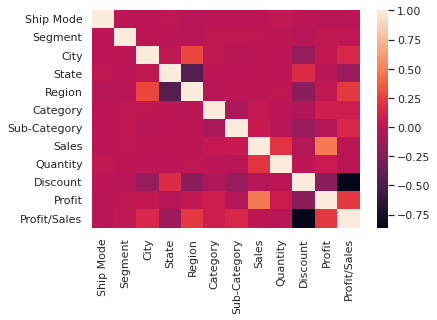

In [285]:
#num_df is numerical data-frame where all the categorical names are converted into unique integers!
num_df = df.copy()

col = ['Ship Mode','Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for i in col:
    num_df[i] = num_df[i].astype('category').cat.codes

#coorelation matrix
corr = num_df.corr(method='pearson')    
sns.heatmap(corr)

corr

### We infer few points from the above Coorelation matrix:
1) There is positive relationship between Sales and Profit ~0.48 , as expected!<br><br>
2) There is a negative relationship between Discount and Profit ~ -0.22, we must look into this.<br><br>
3) Next positive relationship is between Category and Profit, ~ 0.09, but still very low.<br>
*We could look which category produces maximum profit and maximise their production. Also we should look where that category is needed!*<br><br>
4) Sub-category and Discount have significant coorelation ~0.15.
*We need to look which sub-category (also which gives maximum sales maybe) gives most discount and try to reduce that discount*



## Visualization

### Shipment Analysis

Text(0.5, 1.0, 'Sales')

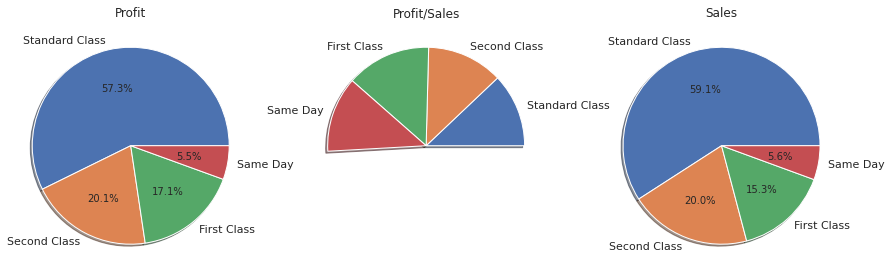

In [286]:
ship_df = df.groupby(['Ship Mode']).sum().reset_index().sort_values('Profit',ascending=False)

fig,axes = plt.subplots(1,3,figsize=(15,15))

axes[0].pie(ship_df['Profit'],labels=ship_df['Ship Mode'],shadow=True,autopct='%1.1f%%')
axes[0].set_title('Profit')

axes[1].pie(ship_df['Profit']/ship_df['Sales'],labels=ship_df['Ship Mode'],shadow=True)
axes[1].set_title('Profit/Sales')

axes[2].pie(ship_df['Sales'],labels=ship_df['Ship Mode'],shadow=True,autopct='%1.1f%%')
axes[2].set_title('Sales')

### Segment Analysis

Text(0.5, 1.0, 'Sales')

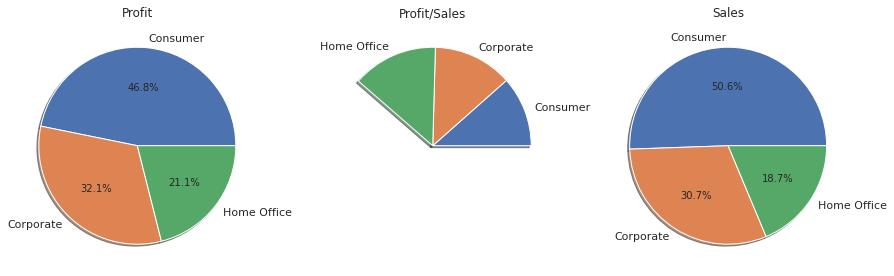

In [287]:
#Segment vs Profit
seg_df = df.groupby(['Segment']).sum().reset_index().sort_values('Profit',ascending=False)

fig,axes = plt.subplots(1,3,figsize=(15,15))
#fig.suptitle('Segment Analysis')

axes[0].pie(seg_df['Profit'],labels=seg_df['Segment'], explode = [0.0,0,0],shadow=True,autopct='%1.1f%%')
axes[0].set_title('Profit')

axes[1].pie(seg_df['Profit']/seg_df['Sales'],labels=seg_df['Segment'], explode = [0.0,0,0],shadow=True)
axes[1].set_title('Profit/Sales')

axes[2].pie(seg_df['Sales'],labels=seg_df['Segment'], explode = [0.0,0,0],shadow=True,autopct='%1.1f%%')
axes[2].set_title('Sales')


Although Profit/Sales ration is similar for all segments, *maximum profit* comes from **Consumer Segment** because of high amount of sales

### Category Analysis

Text(0.5, 1.0, 'Sales')

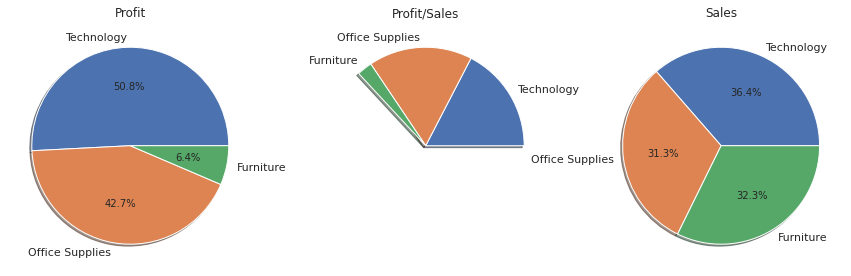

In [288]:
#Category Profit plot

cat_df = df.groupby(['Category']).sum().reset_index().sort_values('Profit',ascending=False)
cat_df['Profit/Sales'] = cat_df['Profit']/cat_df['Sales']

fig,axes = plt.subplots(1,3,figsize=(15,15))

axes[0].pie(cat_df['Profit'],labels=cat_df['Category'], explode = [0.0,0,0],shadow=True,autopct='%1.1f%%')
axes[0].set_title('Profit')

axes[1].pie(cat_df['Profit']/cat_df['Sales'],labels=cat_df['Category'], explode = [0.0,0,0],shadow=True)
axes[1].set_title('Profit/Sales')

axes[2].pie(cat_df['Sales'],labels=cat_df['Category'], explode = [0.0,0,0],shadow=True,autopct='%1.1f%%')
axes[2].set_title('Sales')

1) Although sales are quite similar in all three categories, *maximum profit* comes from **Technology** as its Profit/Sales ratio is quite high!<br>
2) **Furniture** corresponds to *very less profit* due to very low Profit/Sales ratio

### Region Analysis

Text(0.5, 1.0, 'Sales')

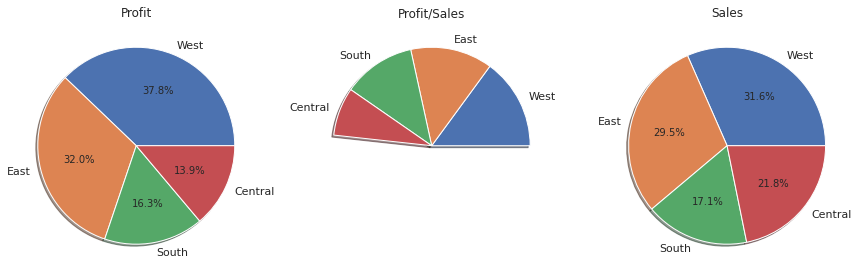

In [289]:
reg_df = df.groupby(['Region']).sum().reset_index().sort_values('Profit',ascending=False)

fig,axes = plt.subplots(1,3,figsize=(15,15))

axes[0].pie(reg_df['Profit'],labels=reg_df['Region'],shadow=True,autopct='%1.1f%%')
axes[0].set_title('Profit')

axes[1].pie(reg_df['Profit']/reg_df['Sales'],labels=reg_df['Region'],shadow=True)
axes[1].set_title('Profit/Sales')

axes[2].pie(reg_df['Sales'],labels=reg_df['Region'],shadow=True,autopct='%1.1f%%')
axes[2].set_title('Sales')

West Region corresponds to maximum profit.

### Sub-Category Analysis

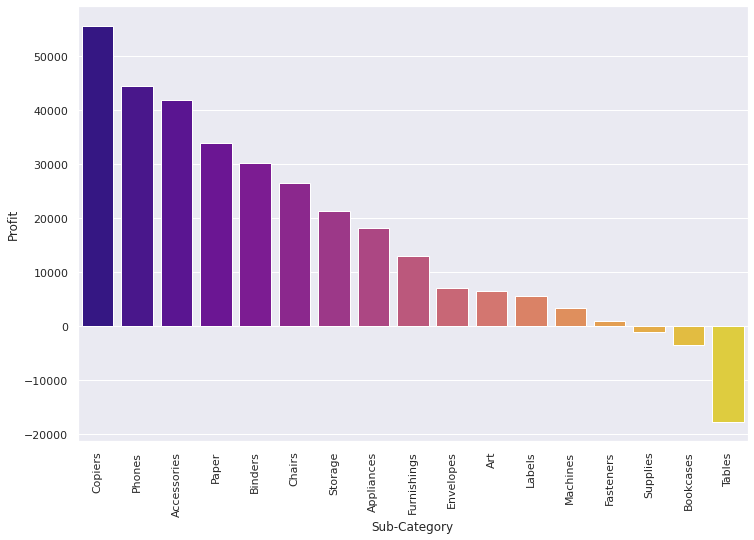

In [290]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
sns.barplot(x='Sub-Category',y='Profit',data=df.groupby(['Sub-Category']).sum().reset_index().sort_values('Profit',ascending=False),palette='plasma')

1) **Tables** produces maximum *loss* <br>
2) **Copiers** produces maximum *profit*

### Discount Analysis

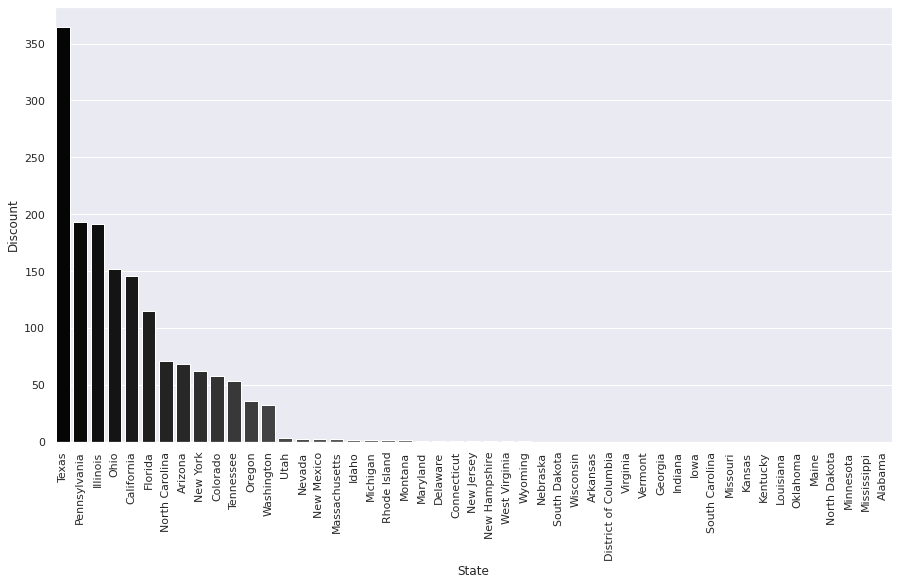

In [291]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')

sns.barplot(x='State',y='Discount',data=df.groupby(['State']).sum().reset_index().sort_values('Discount',ascending=False),palette='gray')
plt.show()

States like Texas, Pennsylvania, Illinoi and Ohio corresponds to very high discount! *We must see if these state correlates to loss.*

### State Analysis

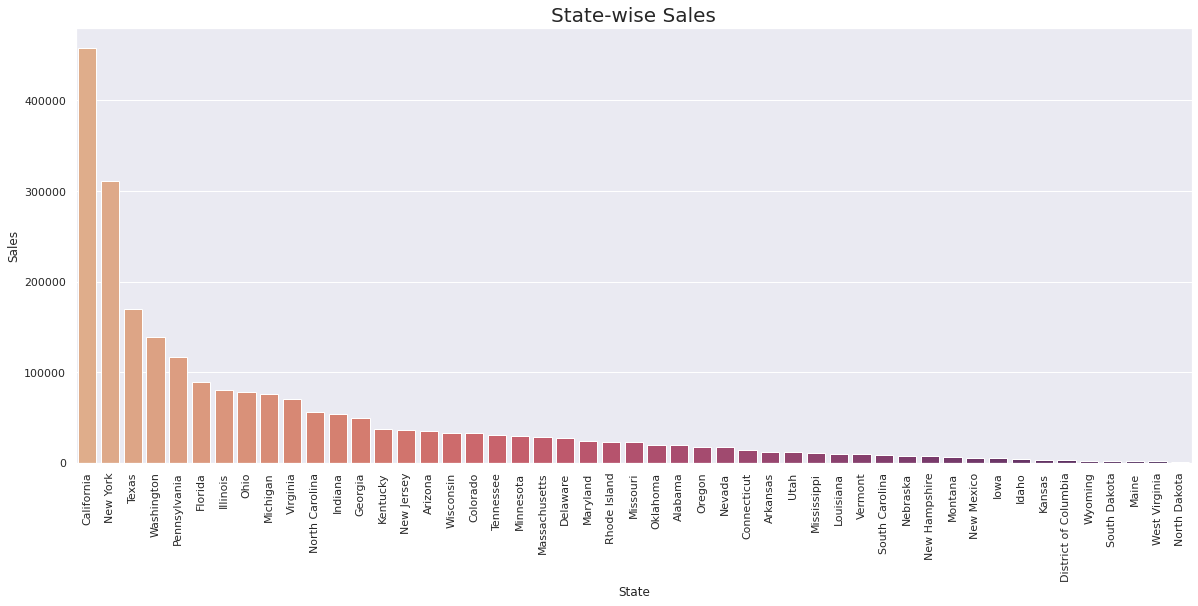

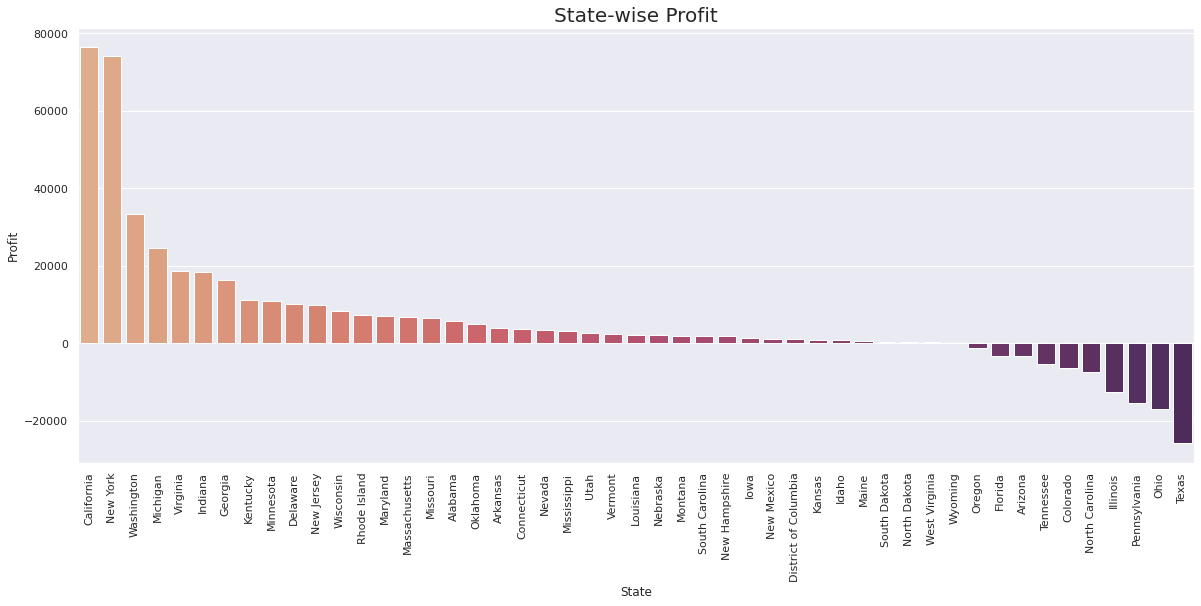

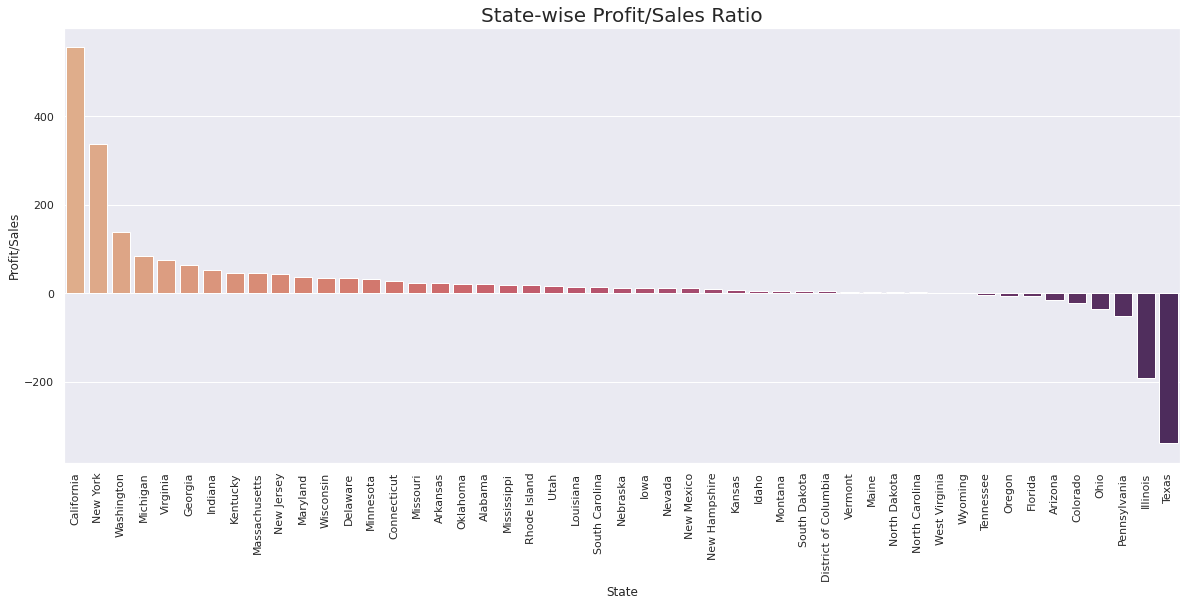

In [292]:
#Sales plot
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
state_sales_df = df.groupby(['State']).sum().reset_index().sort_values('Sales',ascending=False)
sns.barplot(x='State',y='Sales',data=state_sales_df,palette='flare')
plt.title('State-wise Sales',fontsize=20)

plt.show()

#Profit
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
state_pro_df = df.groupby(['State']).sum().reset_index().sort_values('Profit',ascending=False)
sns.barplot(x='State',y='Profit',data=state_pro_df,palette='flare')
plt.title('State-wise Profit',fontsize=20)
plt.show()

#Profit/Sales
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
state_ps_df = df.groupby(['State']).sum().reset_index().sort_values('Profit/Sales',ascending=False)
sns.barplot(x='State',y='Profit/Sales',data=state_ps_df,palette='flare')
plt.title('State-wise Profit/Sales Ratio',fontsize=20)
plt.show()

Texas, Illinois, Pennsylvania, Ohio produces high loss. They also correspond to high discount. Hence **discounts should be reduced in these states**.

### Analysis of top 5 states in Profit


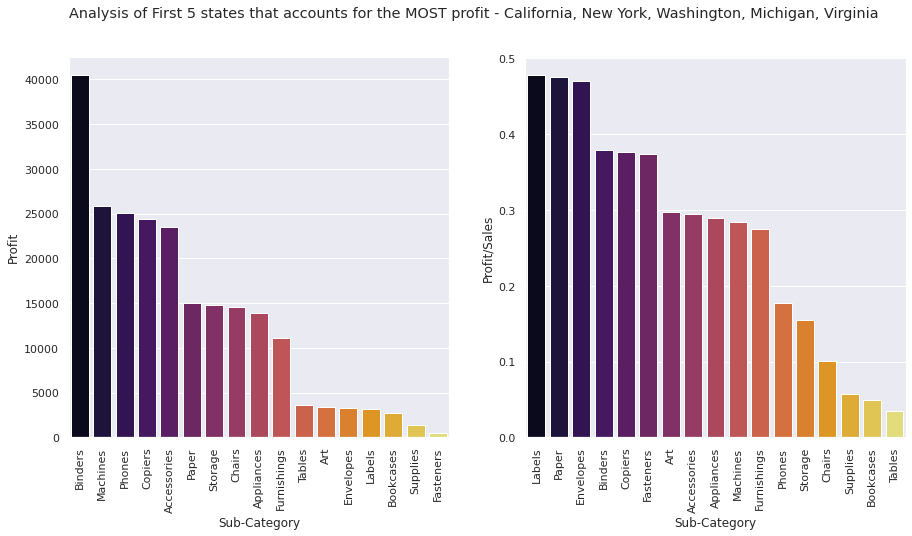

In [293]:
#Setting up dataframe required
temp = df.loc[df['State'].isin(state_pro_df.head(5)['State'])].groupby(['Sub-Category']).sum().reset_index()
temp['Profit/Sales'] = temp['Profit']/temp['Sales']

sns.set_theme(style='darkgrid')
fig,axes = plt.subplots(1,2,figsize=(15,7))

#title
fig.suptitle('Analysis of First 5 states that accounts for the MOST profit - California, New York, Washington, Michigan, Virginia')

#Profit vs Sub-Category
sns.barplot(ax=axes[0],x='Sub-Category',y='Profit',data=temp.sort_values('Profit',ascending=False),palette='inferno')
axes[0].set_xticklabels(labels=temp.sort_values('Profit',ascending=False)['Sub-Category'],rotation=90)

#Profit/Sales vs Sub-Category
sns.barplot(ax=axes[1],x='Sub-Category',y='Profit/Sales',data=temp.sort_values('Profit/Sales',ascending=False),palette='inferno')
axes[1].set_xticklabels(labels=temp.sort_values('Profit/Sales',ascending=False)['Sub-Category'],rotation=90)

plt.show()

Binders, Labels, Paper and Envelopes produces maximum profit and they also correspond to high Profit/Sales ratio. Hence **their production should be maximized**.

### Analysis of bottom 5 states in Profit


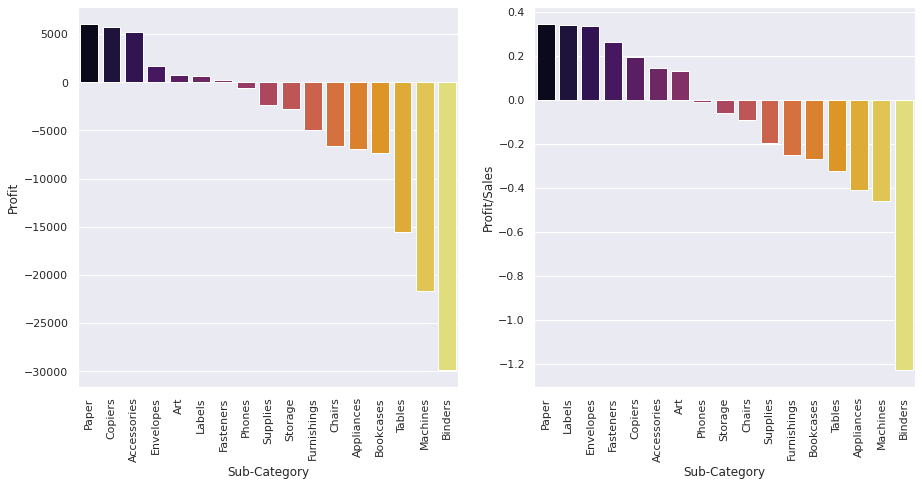

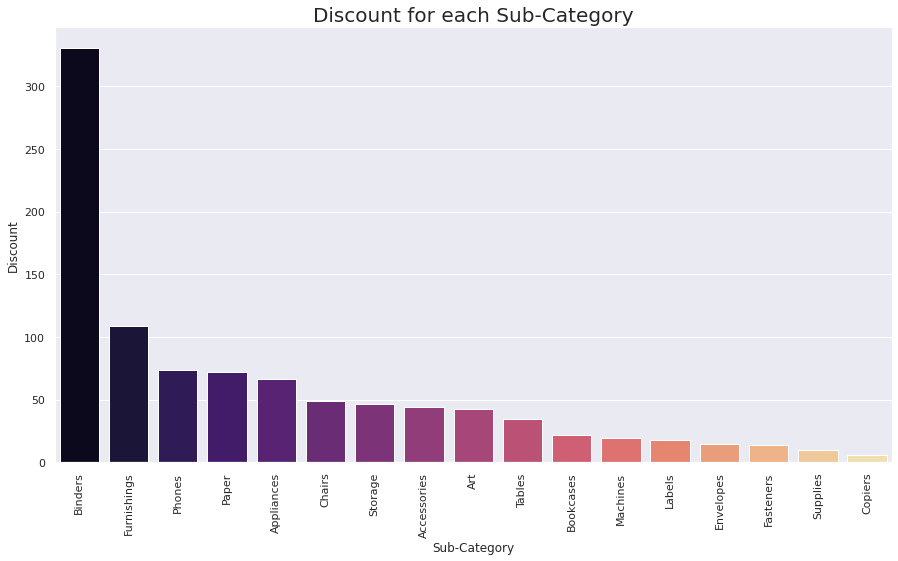

In [294]:
#Setting up dataframe required\
bottom = df.loc[df['State'].isin(state_pro_df.tail(5)['State'])].groupby(['Sub-Category']).sum().reset_index()
bottom['Profit/Sales'] = bottom['Profit']/bottom['Sales']

sns.set_theme(style='darkgrid')
fig,axes = plt.subplots(1,2,figsize=(15,7))

#Profit vs Sub-Category
sns.barplot(ax=axes[0],x='Sub-Category',y='Profit',data=bottom.sort_values('Profit',ascending=False),palette='inferno')
axes[0].set_xticklabels(labels=bottom.sort_values('Profit',ascending=False)['Sub-Category'],rotation=90)

#Profit/Sales ratio vs Sub-Category
sns.barplot(ax=axes[1],x='Sub-Category',y='Profit/Sales',data=bottom.sort_values('Profit/Sales',ascending=False),palette='inferno')
axes[1].set_xticklabels(labels=bottom.sort_values('Profit/Sales',ascending=False)['Sub-Category'],rotation=90)
plt.show()

#Discount on each Sub-Category
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
plt.title('Discount for each Sub-Category',fontsize=20)
sns.barplot(x='Sub-Category',y='Discount',data=bottom.sort_values('Discount',ascending=False),palette='magma')
plt.show()

1) Binders correspond to high loss and high discounts, hence its discount must be reduced significantly to lower the profit<br>
2) Machines, Appliances, Tables and Bookcases also corresponds to high loss, hence its better to not sell them in these cities!

### Analysis of State - Texas 

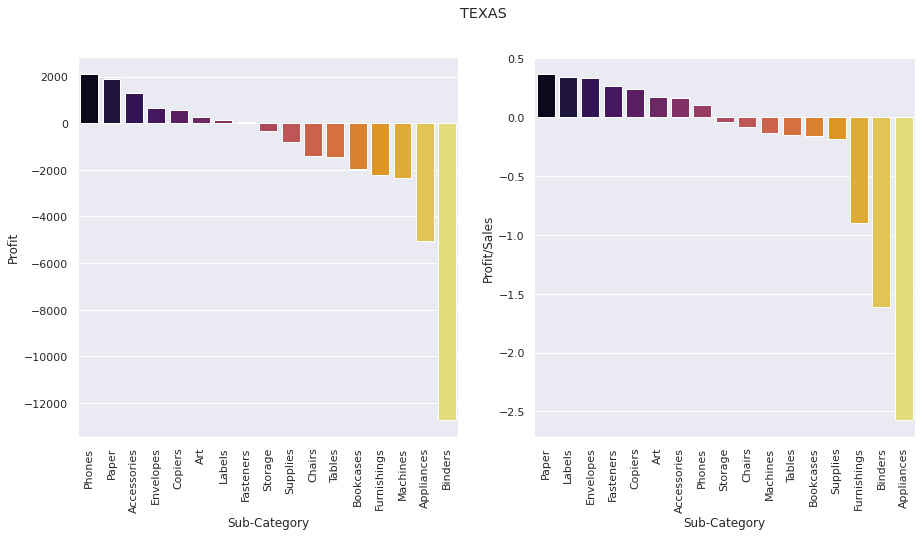

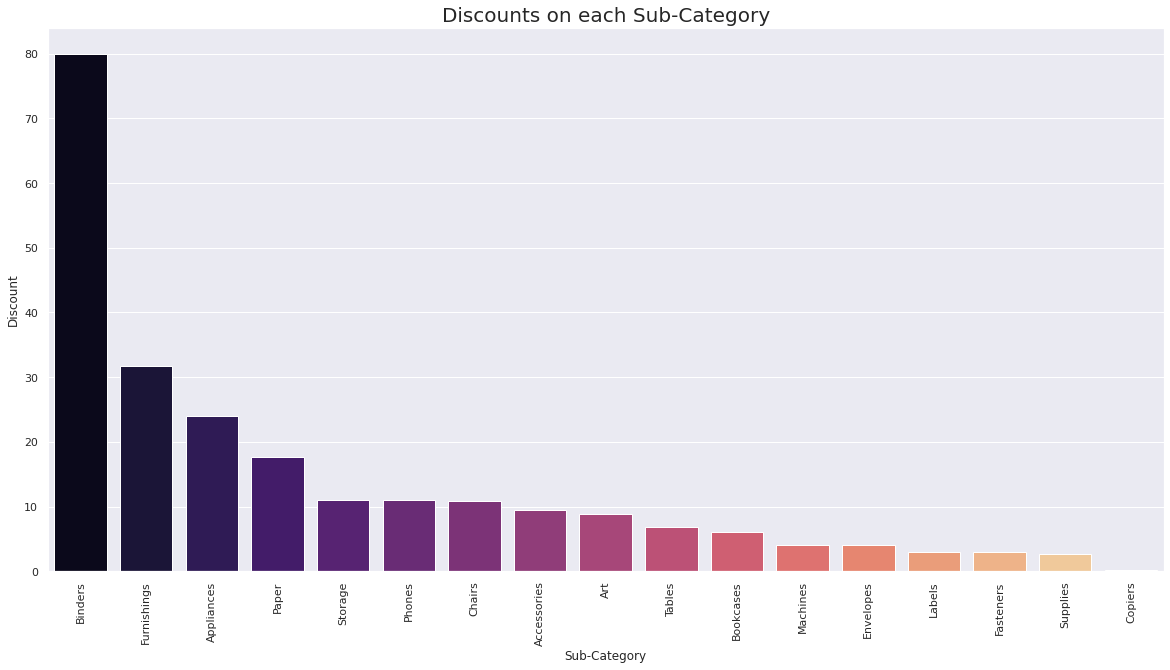

In [295]:
#texas dataframe
tex_df = df.loc[df['State']=='Texas'].groupby(['City']).sum().reset_index().sort_values(by='Profit')

temp = df.loc[df['City'].isin(tex_df.head(5)['City'])].groupby(['Sub-Category']).sum().reset_index()
temp['Profit/Sales'] = temp['Profit']/temp['Sales']

sns.set_theme(style='darkgrid')
fig,axes = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('TEXAS')

#Profit vs Sub-Category
sns.barplot(ax=axes[0],x='Sub-Category',y='Profit',data=temp.sort_values('Profit',ascending=False),palette='inferno')
axes[0].set_xticklabels(labels=temp.sort_values('Profit',ascending=False)['Sub-Category'],rotation=90)

#Profit/Sales ratio Vs Sub-Category
sns.barplot(ax=axes[1],x='Sub-Category',y='Profit/Sales',data=temp.sort_values('Profit/Sales',ascending=False),palette='inferno')
axes[1].set_xticklabels(labels=temp.sort_values('Profit/Sales',ascending=False)['Sub-Category'],rotation=90)

plt.show()

#Discount vs Sub-Category
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
sns.barplot(x='Sub-Category',y='Discount',data=temp.sort_values('Discount',ascending=False),palette='magma')
plt.title('Discounts on each Sub-Category', fontsize=20)
plt.show()

In Texas,
1) Binders produces maximum loss and they are also given high discount. Hence their discount and sales must be lowered.<br>
2) Appliances have very negative Profit/Sales, hence their sales must be reduced.<br>
3) Discount of Furnishing should be reduced.